In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
vax_df = pd.read_csv('datasets/dados_vacinacao.csv')

In [3]:
vax_df.head(1)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,COVID-19 PFIZER - COMIRNATY,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...


<p>De início, será feita uma limpeza nos dados excluindo os dados que podem ser provenientes de erros no Dataset original. Tais como: Idades negativas, muitas idades maiores do que 105 anos (corte arbitrário) e pessoas que aparecem como tendo sido vacinadas antes de 2021.<p>
Para isso, começaremos convertendol as datas que estão em string para datetime

In [4]:
vax_df.vacina_dataAplicacao = pd.to_datetime(vax_df.vacina_dataAplicacao)

In [5]:
drop_this = vax_df.loc[(vax_df.paciente_idade > 110) | (vax_df.paciente_idade < 0) | (vax_df.vacina_dataAplicacao < pd.Timestamp(2021, 1, 17))]

drop_this

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
15030,121,1899-12-30,F,99,SEM INFORMACAO,PICUI,NaN,PICUI,917,Profissionais e Auxiliares de limpeza,9,Trabalhadores de Saúde,2021-01-28,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,f1c3b1a19f65bc23f26fd66ad23411e8ce0583295b8471...
39339,0,1974-11-16,F,99,SEM INFORMACAO,CAMPINA GRANDE,58401,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,1975-02-20,1ª Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,046d325facf10e1f13f78e4e9195cb2dc27953e5075484...
41754,0,1986-04-20,F,99,SEM INFORMACAO,CAMPINA GRANDE,58401,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,1986-04-20,Reforço,87,COVID-19 PFIZER - COMIRNATY,0469ebe1ad08f5040adca17ec248430e5fbf112b749c47...
46665,-8,1983-02-28,M,99,SEM INFORMACAO,MACEIO,None,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,1974-12-05,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,22618b1bff1b85fa4c238413d60891763eb37fcacf7cdf...
67561,114,1906-11-15,F,3,PARDA,CAAPORA,58326,CAAPORA,205,Pessoas de 80 anos ou mais,2,Faixa Etária,2021-03-04,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,758bbb82769356669c7d66a7af04048db770bb747d61b2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727528,0,1962-07-08,M,99,SEM INFORMACAO,BAYEUX,58305,JOAO PESSOA,201,Pessoas de 18 a 64 anos,2,Faixa Etária,1962-06-20,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,e41bf7e6e369aa29e6d26ec77d1d8daa0f60a924a4cbcc...
2733405,111,1910-01-12,F,3,PARDA,JOAO PESSOA,58078,JOAO PESSOA,205,Pessoas de 80 anos ou mais,2,Faixa Etária,2021-02-07,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,dbe3f058be16f383a8392fbb4f89681caf441363366bfa...
2791852,0,1999-02-17,M,3,PARDA,JOAO PESSOA,58034,JOAO PESSOA,507,Policial Militar,5,Forças de Segurança e Salvamento,1999-02-17,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,7f5626eb38d0699cd1c44aef7dfc61bc02ab1589d35433...
2798130,0,1980-04-24,M,99,SEM INFORMACAO,CAMPINA GRANDE,58107,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,1980-04-24,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,dc02c8fb8b211283163a6d8680bbb81216e0831436bf94...


A data escolhida para ser o ponto de corte foi 17 de janeiro de 2021, o dia em que a primeira brasileira a ser vacinada recebeu a primeira vacina aplicada em território nacional.
Essas 153 ocorrências marcadas acima não serão interessantes para as análises a seguir que envolvem esse DataSet. 

In [6]:
vax_df.drop(drop_this.index, inplace = True)

In [7]:
len(vax_df.paciente_id)

2806639

### PIRÂMIDE ETÁRIA

In [8]:
pir_list = []

In [9]:
for i in range(0, 101, 5):
    pir_dict = {}

    if i == 100:
        pir_dict['Age'] = '100+'
        gender_count = vax_df.loc[vax_df.paciente_idade >= 100].value_counts('paciente_enumSexoBiologico')

    else:
        ind = f'{i}-{i + 4}'
        pir_dict['Age'] = ind
        gender_count = vax_df.loc[vax_df.paciente_idade.isin(range(i, i + 5))].value_counts('paciente_enumSexoBiologico')

    pir_dict['M'] = gender_count['M']
    pir_dict['F'] = gender_count['F']

    pir_list.append(pir_dict)

In [27]:
pir_df = pd.DataFrame(pir_list)

In [28]:
pir_df.columns = ['Idade', 'Masculino', 'Feminino']

In [29]:
pir_df['Total'] = pir_df['Masculino'] + pir_df['Feminino']

In [30]:
pir_df['Feminino'] = pir_df['Feminino'] * -1

In [31]:
ord = list(pir_df['Idade'])
ord.reverse()

([<matplotlib.axis.XTick at 0x7ff7235b5100>,
 [Text(-100000, 0, '100000'),
  Text(-50000, 0, '50000'),
  Text(0, 0, '0'),
  Text(50000, 0, '50000'),
  Text(100000, 0, '100000')])

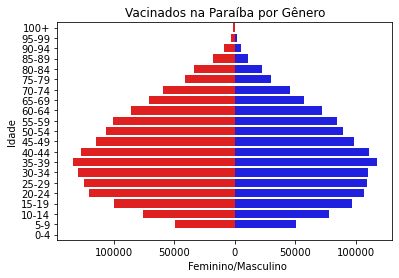

In [32]:
ax1 = sns.barplot(x='Masculino', y='Idade', order = ord ,data= pir_df, color= 'b')
ax2 = sns.barplot(x='Feminino', y='Idade', order = ord, data= pir_df, color = 'r')

plt.title("Vacinados na Paraíba por Gênero")
plt.xlabel("        Feminino/Masculino")

plt.xticks(ticks=[-100000, -50000, 0, 50000, 100000],
labels=['100000', '50000', '0', '50000', '100000'])